<h2 style='font-family: Cascadia Code'>Importamos las librerias necesarias</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style='font-family: Cascadia Code'>Cargamos el dataset</h2>

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<h2 style='font-family: Cascadia Code'>Limpieza del dataset</h2>

In [3]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h3 style='font-family: Cascadia Code'>Información general de los datos</h3>

In [4]:
# Mostramos la información, el tipo de variables con las que trabajeremos, etc...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# Cantidad de elementos que contiene cada columna del dataset
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [6]:
# Eliminamos las columnas innecesarias
df = df.drop(columns=['Unnamed: 0','salary','salary_currency','company_size'], axis=1)

# Modificación del nombre de algunos elementos del dataset para mejor claridad en los análisis gráficos
df.experience_level.replace(['MI','SE','EN','EX'],['Midlevel','Senior','Junior','Director'],inplace=True)
df.employment_type.replace(['FT','PT','CT','FL'],['Full-Time','Part-Time','Contract','Freelancer'],inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,2020,Midlevel,Full-Time,Data Scientist,79833,DE,0,DE
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,JP,0,JP
2,2020,Senior,Full-Time,Big Data Engineer,109024,GB,50,GB
3,2020,Midlevel,Full-Time,Product Data Analyst,20000,HN,0,HN
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,US,50,US


<br>
<h1 style='font-family: Cascadia Code'>Análisis gráfico</h1>

<br>
<h3 style='font-family: Cascadia Code'>Distribución del salario</h3>

In [7]:
# Mostramos una descripción general del salario
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Salary distribution')

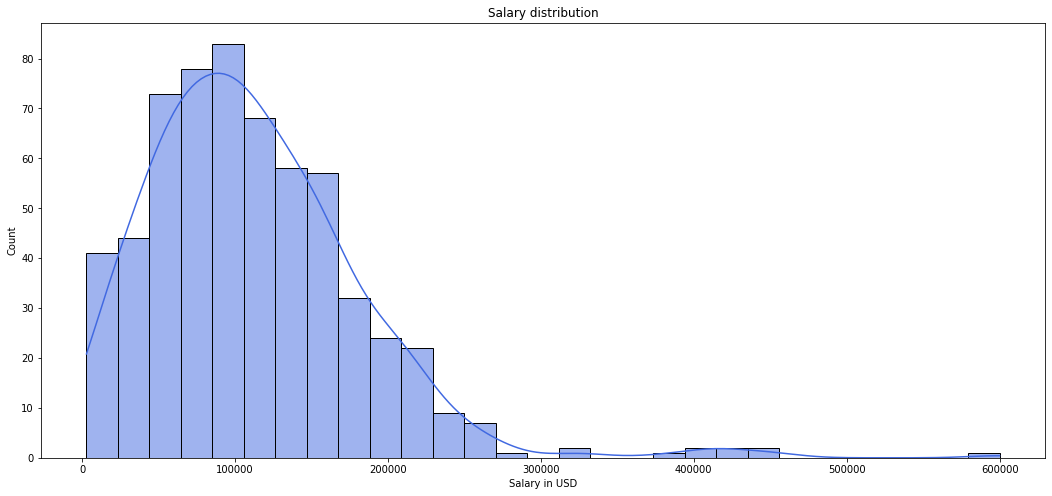

In [8]:
# Creamos un histograma que nos muestre de forma gráfica la distribución del salario
plt.figure(figsize=(18,8))
sns.histplot(data=df, x='salary_in_usd', color='royalblue', kde=True)
plt.xlabel('Salary in USD')
plt.title('Salary distribution')

<li style='font-family: Cascadia Code'> El salario tiende a una asimetría positiva, con mediana cercana a los 150.000 USD, moda cercana a los 100.000 USD y media en los 200.000 USD aproximadamente.</li>

<br>
<h3 style='font-family: Cascadia Code'>Distribución del salario, pero ahora por cada año estudiado</h3>

Text(0.5, 1.0, 'Salary distribution')

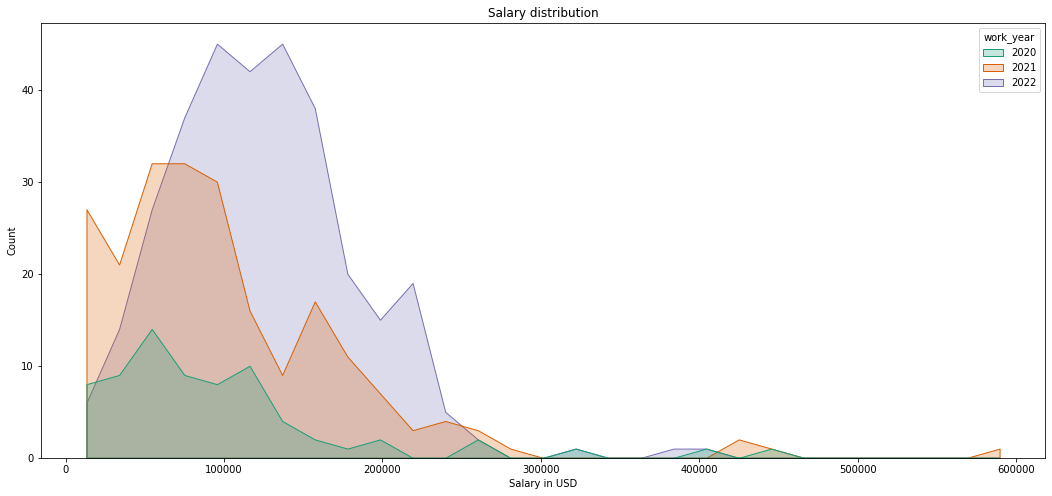

In [9]:
# Creamos un histograma que relaciona el salario en USD con respecto a los años 2020, 2021 y lo que va del 2022 
plt.figure(figsize=(18,8))
sns.histplot(data=df, x='salary_in_usd', hue='work_year', element='poly', palette='Dark2')
plt.xlabel('Salary in USD')
plt.title('Salary distribution')

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        A primera vista, se ve un crecimiento del salario año a año, tomando como parametro inicial el 2020</li>
</div>

<br>
<h3 style='font-family: Cascadia Code'>¿Se ha incrementado el nivel de experiencia en el mercado?</h3>

Text(0.5, 0, 'Experience Level')

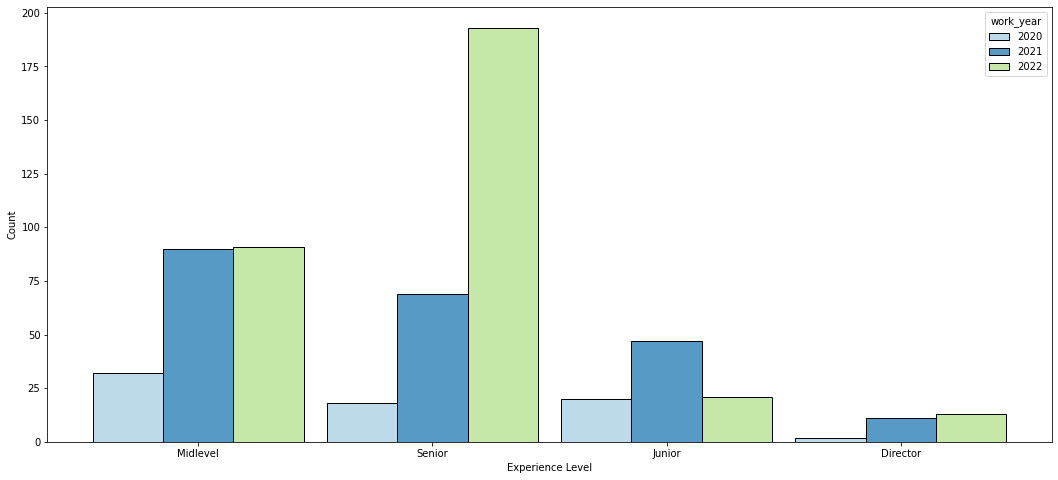

In [10]:
# Creamos un histograma de tipo categórico para mostrar si hubo un incremento o disminución
# en el nivel de experiencia en base a los años analizados
plt.figure(figsize=(18,8))
sns.histplot(data=df, hue='work_year', x='experience_level', 
                multiple='dodge', shrink=.9, palette='Paired')
plt.xlabel('Experience Level')

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        El nivel 'Senior' fue el que tuvo el crecimiento más grande, mientras que el 'Director' fue el más bajo</li>
    <br>
    <li style='font-family: Cascadia Code'>
        Los 'Midlevel' y 'Director' se mantienen casi con el mismo nivel de creciemiento con respecto al 2021, mientras que los 'Junior' estan por debajo del creciemiento del 2021 pero igualando al de 2020</li>
</div>

<br>
<h2 style='font-family: Cascadia Code'>Salario en USD con respecto al nivel de experiencia</h2>

Text(0, 0.5, 'Salary in USD')

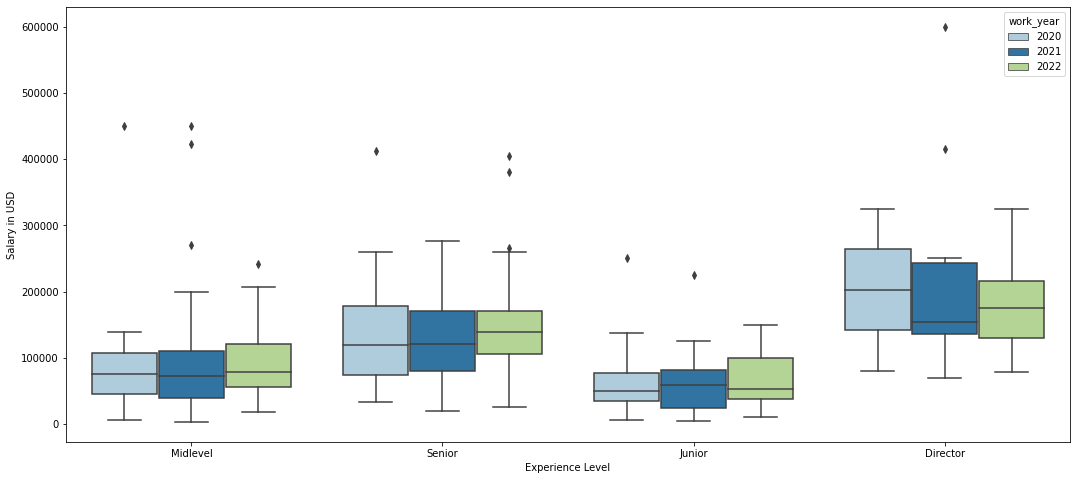

In [11]:
# Creamos un gráfico de boxplots de tipo categórico para mostrar los distintos niveles de experiencia
# en base al año analizado y el salario (en USD) de cada grupo
plt.figure(figsize=(18,8))
sns.boxplot(data=df, y='salary_in_usd', hue='work_year', x='experience_level', palette='Paired')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        <u>Junior</u>: Salarios por debajo de los 100.000 USD, con dos valores atípicos entre los 210.000 USD y 260000 USD.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Midlevel</u>: Salarios entre los 60.000 USD hasta 120.000 USD, contiene la mayor cantidad de datos atípicos entre los 250.000 USD y los 450.000 USD.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Senior</u>: Salarios entre los 80.000 USD hasta 180.000 USD, con 4 valores atípicos entre
            los 280.000 USD y 400.000 USD.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Director</u>: Salarios entre los 160.000 USD hasta 250.000 USD, con 4 valores atípicos entre
            los 400.000 USD y 600.000 USD.</li>
</div>

<br>
<h2 style='font-family: Cascadia Code'>Salario en USD con respecto al tipo de empleo</h2>

Text(0, 0.5, 'Salary in USD')

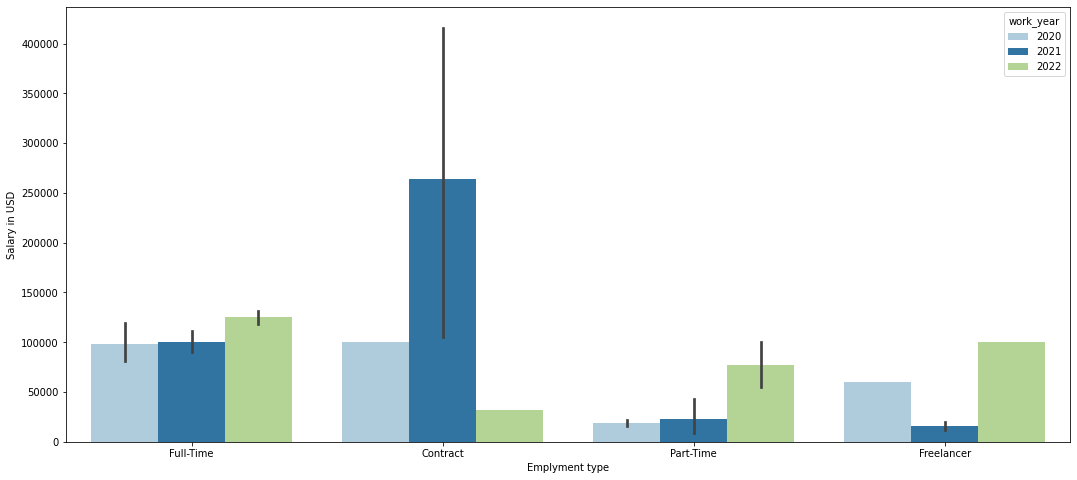

In [12]:
# Creamos un gráfico de barras para visualizar el salario en USD (año a año) con respecto al tipo de empleo 
plt.figure(figsize=(18,8))
sns.barplot(data=df, y='salary_in_usd', hue='work_year', x='employment_type', palette='Paired')
plt.xlabel('Emplyment type')
plt.ylabel('Salary in USD')

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        <u>Full-Time</u>: Salarios  de 2020 y 2021 cerca de los 100.000 USD, con un incremento del 20% en lo que va del 2022 alcanzando 120.000 USD.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Contract</u>: Salario de 100.000 USD en 2020, un incremento del 260% en 2021 (260.000 con picos de mas de 400.000 USD). En lo que va del 2022, vemos una disminución del 88% con respecto al 2021, alcanzando los 30.000 USD.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Part-Time</u>: Salario de 20.000 USD en 2020, un incremento del 25% en 2021 (25.000 con picos de mas de 40.000 USD). En lo que va del 2022, vemos un incremento de aproximadamente 300% con respecto al 2021, alcanzando los 65.000 USD (con picos cerca de los 100.000 USD).</li>
    <br>
    <li style='font-family: Cascadia Code'>
        <u>Freelacer</u>: Salario de 55.000 USD en 2020, una disminución del 45% en 2021 (25.000 USD). En lo que va del 2022, vemos un incremento del 400% con respecto al 2021, alcanzando los 100.000 USD.</li>
</div>

<br>
<h2 style='font-family: Cascadia Code'>TOP 4 salarios promedios</h2>

In [13]:
# Creamos un short dataframe que nos muestre de forma tabular los salarios (en promedio) mas altos de la industria
salary_title_df = df.groupby("job_title").agg(mean_salary=('salary_in_usd', 'mean'), 
    count=('job_title', 'count')).reset_index()
salary_title_top4 = salary_title_df.sort_values(by="count", ascending=False).head(4)
salary_title_top4

,job_title,mean_salary,count
22,Data Scientist,108187.832168,143
17,Data Engineer,112725.000000,132
12,Data Analyst,92893.061856,97
38,Machine Learning Engineer,104880.146341,41


<br>
<h2 style='font-family: Cascadia Code'>Analicemos cada uno a detalle</h2>

In [14]:
# Filtramos cada titulo por separado
ds_df = df[df['job_title']=='Data Scientist']
da_df = df[df['job_title']=='Data Analyst']
de_df = df[df['job_title']=='Data Engineer']
mle_df = df[df['job_title']=='Machine Learning Engineer']

<br>
<h3 style='font-family: Cascadia Code'>Data Analyst</h3>

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

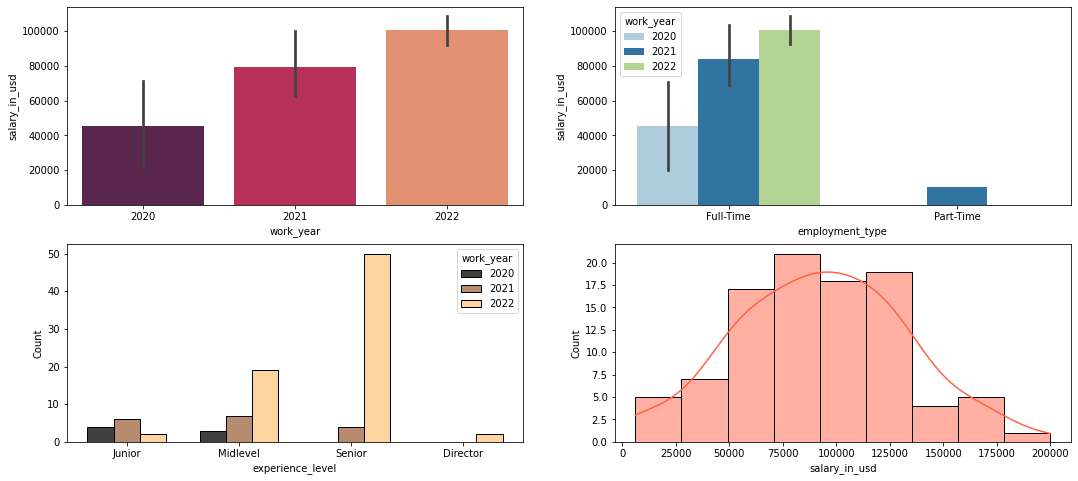

In [15]:
plt.figure(figsize=(18,8))


# Gráfico de barras que nos muestra el crecimento o decrecimiento salarial a partir del 2020
plt.subplot(2,2,1)
sns.barplot(data=da_df, x='work_year', y='salary_in_usd', palette='rocket')


# Gráfico de barras categorico que nos muestra el crecimiento o descrecimiento del salario, teniendo como parámetro
# el tipo de empleo y a su vez el análisis anual
plt.subplot(2,2,2)
sns.barplot(data=da_df, x='employment_type', y='salary_in_usd', hue='work_year', palette='Paired')


# Histograma categórico que nos muestra el crecimiento o decrecimiento del nivel de experiencia año a año 
plt.subplot(2,2,3)
sns.histplot(data=da_df, hue='work_year', x='experience_level', 
                multiple='dodge', shrink=.7, palette='copper')


# Histograma simple que nos muestra la distribución del salario
plt.subplot(2,2,4)
sns.histplot(data=da_df, x='salary_in_usd', color='tomato', kde=True)

In [16]:
da_df.salary_in_usd.describe()

count        97.000000
mean      92893.061856
std       39961.075848
min        6072.000000
25%       62000.000000
50%       90320.000000
75%      116150.000000
max      200000.000000
Name: salary_in_usd, dtype: float64

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        Incremento del salario desde 2020, alcanzando los 100.000 USD en el transucurso del 2022.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        Vemos que solo se encontraron en su mayoría trabajos de tipo Full-Time, donde el incremento salarial corresponde a la observación anterior.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El nivel de experiencia 'Senior' fue el que más crecio en los ultimos 2 años, seguido de los 'Midlevel', luego los 'Junior' y por último los 'Director'</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El salario sigue una distribución normal, con mediana y media entre los 90.000 y 93.000 USD, moda en los 75.000 USD.</li>
</div>

<br>
<h3 style='font-family: Cascadia Code'>Machine Learning Engineer</h3>

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

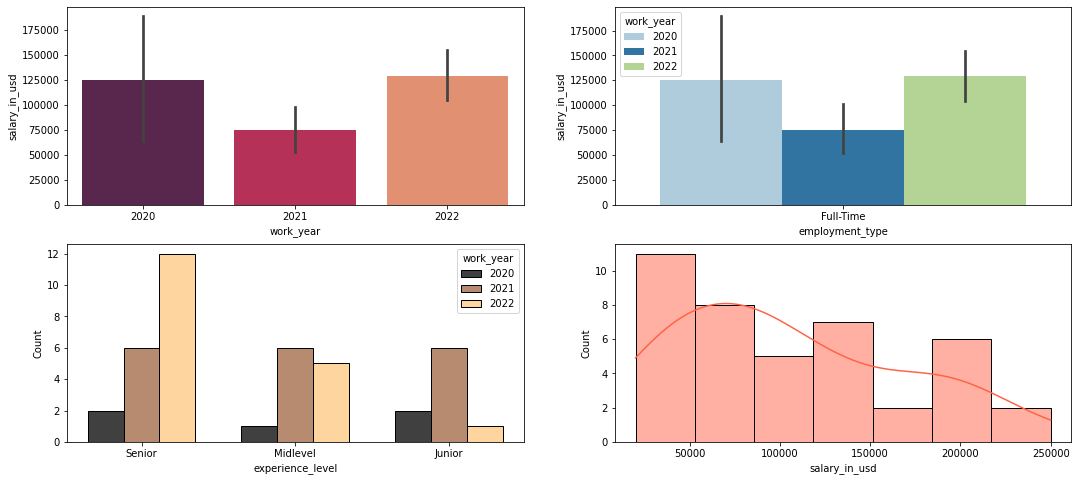

In [17]:
plt.figure(figsize=(18,8))


# Gráfico de barras que nos muestra el crecimento o decrecimiento salarial a partir del 2020
plt.subplot(2,2,1)
sns.barplot(data=mle_df, x='work_year', y='salary_in_usd', palette='rocket')


# Gráfico de barras categórico que nos muestra el crecimiento o descrecimiento del salario, teniendo como parámetro
# el tipo de empleo y a su vez el análisis anual
plt.subplot(2,2,2)
sns.barplot(data=mle_df, x='employment_type', y='salary_in_usd', hue='work_year', palette='Paired')


# Histograma categórico que nos muestra el crecimiento o decrecimiento del nivel de experiencia año a año 
plt.subplot(2,2,3)
sns.histplot(data=mle_df, hue='work_year', x='experience_level', 
                multiple='dodge', shrink=.7, palette='copper')


# Histograma simple que nos muestra la distribución del salario
plt.subplot(2,2,4)
sns.histplot(data=mle_df, x='salary_in_usd', color='tomato', kde=True)

In [18]:
mle_df.salary_in_usd.describe()

count        41.000000
mean     104880.146341
std       63218.626439
min       20000.000000
25%       51064.000000
50%       87932.000000
75%      150000.000000
max      250000.000000
Name: salary_in_usd, dtype: float64

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        El Salario en el año 2020 alcanzo los 175.000 USD como pico maximo, luego hubo una disminución del 40% con respecto a ese mismo año en el 2021 y en el transcurso de lo que va el 2022 se incrementó un 40% nuevamente.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        Vemos que solo se encontraron trabajos de tipo Full-Time, donde el incremento salarial corresponde a la observación anterior.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El nivel de experiencia 'Senior' fue el que más crecio en los últimos 2 años, seguido de los 'Midlevel', luego los 'Junior'. En la categoría 'Director' no se econtraron datos.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El salario se asemeja a una asimetría positiva, con mediana cercana a los 90.000 USD, moda por debajo de los 50.000 USD y media cercana a los 105.000 USD.</li>

<br>
<h3 style='font-family: Cascadia Code'>Data Scientist</h3>

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

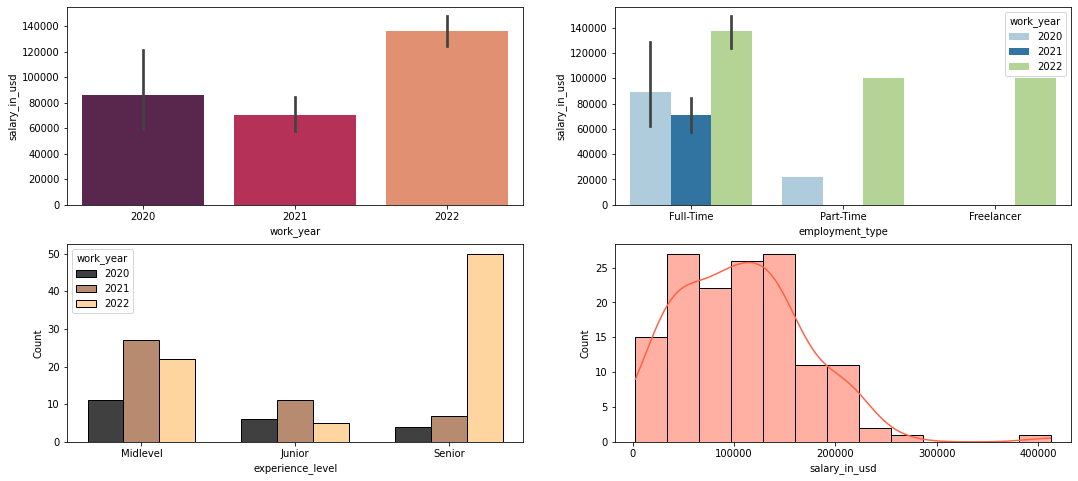

In [19]:
plt.figure(figsize=(18,8))


# Gráfico de barras que nos muestra el crecimento o decrecimiento salarial a partir del 2020
plt.subplot(2,2,1)
sns.barplot(data=ds_df, x='work_year', y='salary_in_usd', palette='rocket')


# Gráfico de barras categórico que nos muestra el crecimiento o descrecimiento del salario, teniendo como parámetro
# el tipo de empleo y a su vez el análisis anual
plt.subplot(2,2,2)
sns.barplot(data=ds_df, x='employment_type', y='salary_in_usd', hue='work_year', palette='Paired')


# Histograma categórico que nos muestra el crecimiento o decrecimiento del nivel de experiencia año a año 
plt.subplot(2,2,3)
sns.histplot(data=ds_df, hue='work_year', x='experience_level', 
                multiple='dodge', shrink=.7, palette='copper')


# Histograma simple que nos muestra la distribución del salario
plt.subplot(2,2,4)
sns.histplot(data=ds_df, x='salary_in_usd', color='tomato', kde=True)

In [20]:
ds_df.salary_in_usd.describe()

count       143.000000
mean     108187.832168
std       64112.840519
min        2859.000000
25%       54724.000000
50%      103691.000000
75%      140850.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        Incremento del salario desde 2020, alcanzando los 140.000 USD en el transucurso del 2022.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        Vemos que solo se encontraron trabajos de tipo Full-Time, donde el incremento salarial corresponde a la observación anterior. Luego observamos que existen trabajos Part-Time que incrementeron los salarios alcanzando los 100.000 USD, y Freelancer comienzan a tomar más fuerza, equiparando el salario de los empleos Part-Time en lo que va de este 2022.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El nivel de experiencia 'Senior' fue el que más crecio en los últimos 2 años, seguido de los 'Midlevel', luego los 'Junior'. En la categoría 'Director' no se econtraron datos.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El salario tiende a una asimetría positiva, con mediana cercana a los 100.000 USD, moda en los 50.000 y  los 150.000 USD. La media esta cerca de los 110.000 USD.</li>
</div>

<br>
<h3 style='font-family: Cascadia Code'>Data Engineer</h3>

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

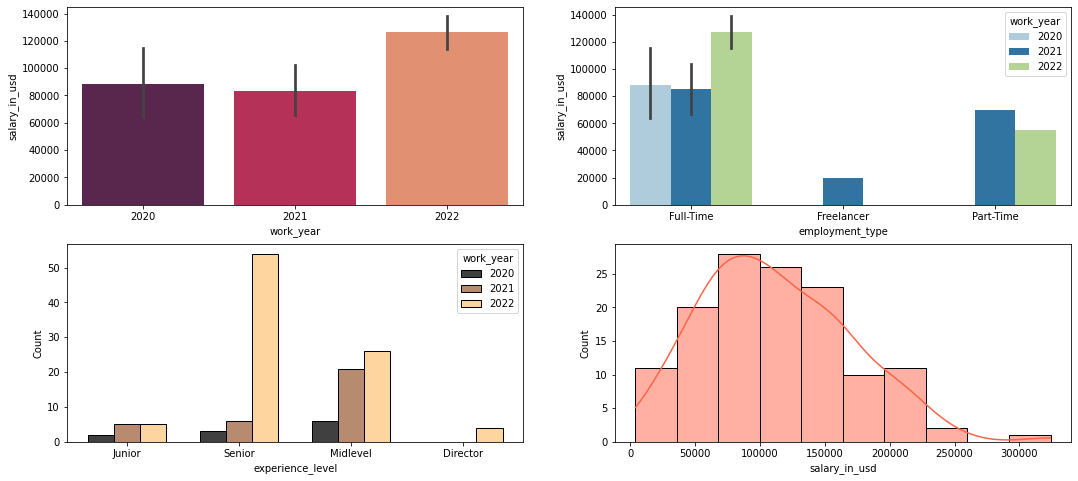

In [21]:
plt.figure(figsize=(18,8))


# Gráfico de barras que nos muestra el crecimento o decrecimiento salarial a partir del 2020
plt.subplot(2,2,1)
sns.barplot(data=de_df, x='work_year', y='salary_in_usd', palette='rocket')


# Gráfico de barras categórico que nos muestra el crecimiento o descrecimiento del salario, teniendo como parámetro
# el tipo de empleo y a su vez el análisis anual
plt.subplot(2,2,2)
sns.barplot(data=de_df, x='employment_type', y='salary_in_usd', hue='work_year', palette='Paired')


# Histograma categórico que nos muestra el crecimiento o decrecimiento del nivel de experiencia año a año 
plt.subplot(2,2,3)
sns.histplot(data=de_df, hue='work_year', x='experience_level', 
                multiple='dodge', shrink=.7, palette='copper')


# Histograma simple que nos muestra la distribución del salario
plt.subplot(2,2,4)
sns.histplot(data=de_df, x='salary_in_usd', color='tomato', kde=True)

In [22]:
de_df.salary_in_usd.describe()

count       132.000000
mean     112725.000000
std       57629.082107
min        4000.000000
25%       70039.500000
50%      105500.000000
75%      154600.000000
max      324000.000000
Name: salary_in_usd, dtype: float64

<h4 style='font-family: Cascadia Code'>Observaciones: </h4>
<div>
    <li style='font-family: Cascadia Code'>
        Incremento del salario desde 2020, alcanzando los 140.000 USD en el transucurso del 2022.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        Vemos que se encontraron trabajos de tipo Full-Time, donde el incremento salarial corresponde a la observación anterior. Luego observamos que existen trabajos Part-Time que incrementeron los salarios alcanzando los 80.000 USD, y  los Freelancer comienzan a incrementar el salario, alcanzando los 20.000 USD en 2021.</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El nivel de experiencia 'Senior' fue el que más crecio en los últimos 2 años, seguido de los 'Midlevel', luego los 'Junior' y por último los 'Director'</li>
    <br>
    <li style='font-family: Cascadia Code'>
        El salario tiende a una asimetría positiva, con mediana cercana a los 100.000 USD, la moda levemente por debajo de los 100.000 USD. La media esta cerca de los 115.000 USD.</li>
</div>